In [6]:
from aqua import Reader, catalogue, inspect_catalogue
import sys
import os
import xarray as xr
import numpy as np
import matplotlib.pylab as plt

%env PATH={os.environ["PATH"]}:{sys.exec_prefix}/bin/

env: PATH=/sw/spack-levante/texlive-live2021-l5o6sw/bin/x86_64-linux:/sw/spack-levante/texlive-live2021-l5o6sw/bin:/sw/spack-levante/git-lfs-2.11.0-oihcwo/bin:/sw/spack-levante/git-2.31.1-25ve7r/bin:/sw/spack-levante/jupyterhub/jupyterhub/bin:/sw/spack-workplace/spack/bin:/usr/share/Modules/bin:/usr/local/bin:/usr/bin:/usr/local/sbin:/usr/sbin:/sw/spack-levante/mambaforge-4.11.0-0-Linux-x86_64-sobz6z/bin/:/sw/spack-levante/mambaforge-4.11.0-0-Linux-x86_64-sobz6z/bin/


In [7]:
cat = catalogue()
#inspect_catalogue(cat)

IFS	tco3999-ng5	2.8km experiment, coupled with FESOM
	- ICMGG_atm2d	original 2d output
	- ICMU_atm2d	original 2d output (lnsp)
	- ICMU_atm3d	original 3d output
	- interpolated_global	NN interpolation to 5400x2700 grid (lon=[-180,180], lat=[-90, 90])
IFS	tco2559-ng5	4km experiment, coupled with FESOM
	- ICMGG_atm2d	original 2d output
	- ICMU_atm2d	original 2d output (lnsp)
	- ICMU_atm3d	original 3d output
	- interpolated_global	NN interpolation to 5400x2700 grid (lon=[-180,180], lat=[-90, 90])
	- lra-r100-mon	LRA monthly data 1x1 deg regular grid
IFS	tco1279-orca025	9km baseline, coupled to NEMO, deep conv ON
	- ICMGG_atm2d	original 2d output
	- ICMU_atm2d	original 2d output (lnsp)
	- ICMU_atm3d	original 3d output
	- lra-r100-mon	LRA monthly data 1x1 deg regular grid
IFS	test-tco2559	4km experiment, coupled with FESOM
	- ICMGG_atm2d	2d output
	- ICMU_atm3d	3d output
IFS	test-tco79	TCO79 test data
	- short	original 2d output
	- long	coarse IFS data 1y

FESOM	tco3999-ng5	2.5km experiment,

In [8]:
#inspect_catalogue(cat, model = 'CERES', exp = 'ebaf-toa41')

In [9]:
reader_tco2559 = Reader(model = 'IFS', exp = 'tco2559-ng5', source = 'ICMGG_atm2d')
data_tco2559 = reader_tco2559.retrieve()

In [11]:
reader_CERES = Reader(model='CERES', exp = 'ebaf-toa42', source = 'monthly')
ceres = reader_CERES.retrieve()
#ceres

FileNotFoundError: [Errno 2] No such file or directory: '/pool/data/ICDC/atmosphere/ceres_ebaf/DATA/CERES_EBAF-TOA_Ed4.2_Subset_200003-202208.nc'

In [ ]:
ceres

In [101]:
#data_tco2559

In [102]:
toa_olw_tco2559 = data_tco2559.tsrc
toa_olw_tco2559_gm = reader_tco2559.fldmean(toa_olw_tco2559)
toa_sw_tco2559 = data_tco2559.tisr
toa_sw_tco2559_gm =  reader_tco2559.fldmean(toa_sw_tco2559)

In [103]:
toa_net_tco2559 = toa_olw_tco2559 - toa_sw_tco2559
toa_net_tco2559

<xarray.DataArray (time: 8329, value: 26306560)>
dask.array<sub, shape=(8329, 26306560), dtype=float64, chunksize=(1, 26306560), chunktype=numpy.ndarray>
Coordinates:
    lat      (value) float64 dask.array<chunksize=(26306560,), meta=np.ndarray>
    lon      (value) float64 dask.array<chunksize=(26306560,), meta=np.ndarray>
  * time     (time) datetime64[ns] 2020-01-20 2020-01-20T01:00:00 ... 2021-01-01
Dimensions without coordinates: value

Anomalies wrt global model mean

In [104]:
yearmean_olw_tco2559 = toa_olw_tco2559.resample(time='Y').mean('time').mean(dim='time')

In [105]:
anomaly_olw_tco2559 = toa_olw_tco2559 - yearmean_olw_tco2559

In [106]:
anomaly = toa_olw_tco2559.mean() - toa_olw_tco2559

In [107]:
ceres_tnr

<xarray.DataArray 'toa_net_clr_t_mon' (time: 265, lat: 180, lon: 360)>
dask.array<open_dataset-74968157ac27cf3aa8dfa82e30b543abtoa_net_clr_t_mon, shape=(265, 180, 360), dtype=float32, chunksize=(265, 180, 360), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 2000-03-15 2000-04-15 ... 2022-03-15
  * lon      (lon) float32 0.5 1.5 2.5 3.5 4.5 ... 355.5 356.5 357.5 358.5 359.5
  * lat      (lat) float32 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
Attributes:
    standard_name:  TOA Net Flux - Clear-Sky (for total region)
    long_name:      Top of The Atmosphere Net Flux, Clear-Sky (for total regi...
    units:          W m-2
    CF_name:        none
    comment:        Clear-sky flux computed by radiative transfer model where...
    valid_min:           -400.000
    valid_max:            400.000

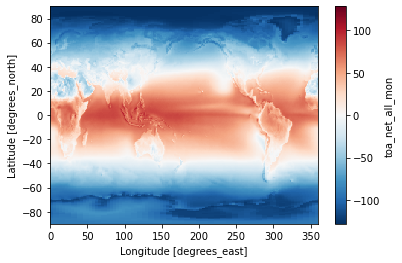

In [109]:
ceres['toa_net_all_mon'].sel(time=ceres.time).mean(dim='time').plot()

In [155]:
#ceres_ttr = ceres.toa_lw_all_mon *-1
#ceres_tsr = ceres.toa_sw_all_mon
#ceres_tnr = ceres.toa_net_all_mon

In [128]:
ceres_global_net_mean = reader_CERES.fldmean(ceres['toa_net_all_mon'].sel(time=slice("2020-01-20", "2021-01-01")))

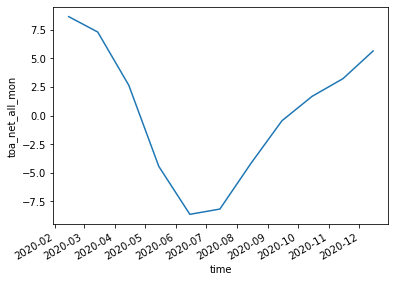

In [129]:
ceres_global_net_mean.plot()

In [156]:
#TOA_ceres = ceres_tsr.to_dataset(name='tsr')
#TOA_ceres = TOA_ceres.assign(ttr=ceres_ttr)
#TOA_ceres = TOA_ceres.assign(tnr=ceres_tnr)

# limit to years that are complete
#TOA_ceres = TOA_ceres.sel(time=slice('2001','2021'))

In [157]:
ceres_global_net_mean

<xarray.DataArray 'toa_net_all_mon' (time: 11)>
dask.array<truediv, shape=(11,), dtype=float64, chunksize=(11,), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 2020-02-15 2020-03-15 ... 2020-12-15

In [131]:
# Calculate ceres mean
ceres_mean = ceres_global_net_mean.values.mean()
ceres_mean

0.2927597966466958

ceres anomaly

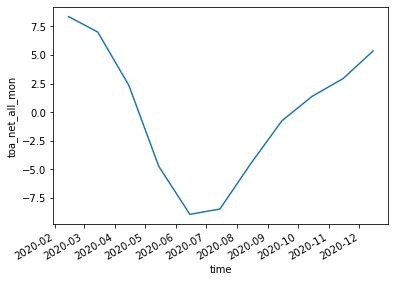

In [154]:
# Calculate the anomalies
anomalies_ceres = ceres['toa_net_all_mon'] - ceres_mean

anomalies_ceres_fldmean = reader_CERES.fldmean((ceres['toa_net_all_mon']-ceres_mean).sel(time=slice("2020-01-20", "2021-01-01")))
anomalies_ceres_fldmean.plot()

In [137]:
anomalies_ceres

<xarray.DataArray 'toa_net_all_mon' (time: 265, lat: 180, lon: 360)>
dask.array<sub, shape=(265, 180, 360), dtype=float32, chunksize=(265, 180, 360), chunktype=numpy.ndarray>
Coordinates:
  * lon      (lon) float32 0.5 1.5 2.5 3.5 4.5 ... 355.5 356.5 357.5 358.5 359.5
  * lat      (lat) float32 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * time     (time) datetime64[ns] 2000-03-15 2000-04-15 ... 2022-03-15

In [59]:
anomaly_tco2559_olw_ceres = toa_net_tco2559 - ceres_selected
#anomaly_tco2559_olw_ceres.plot()

NameError: name 'TOA_ceres_ref' is not defined

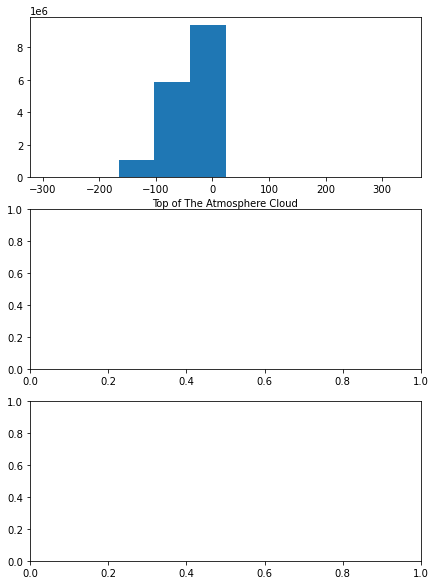